In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [57]:
data.drop(['User ID'],axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [58]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [59]:
lb=LabelEncoder()



In [60]:
data['A_Gender']=lb.fit_transform(data['Gender'])


In [61]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased,A_Gender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


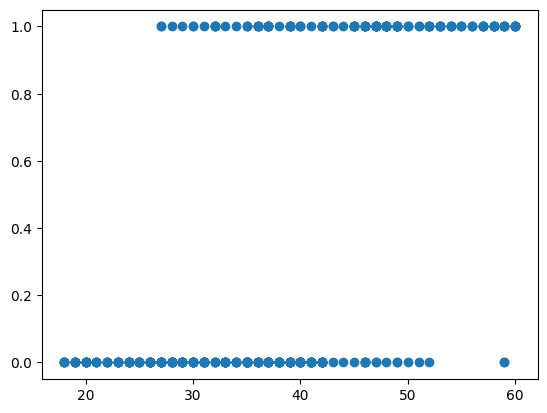

In [62]:
plt.scatter(data.Age,data.Purchased)

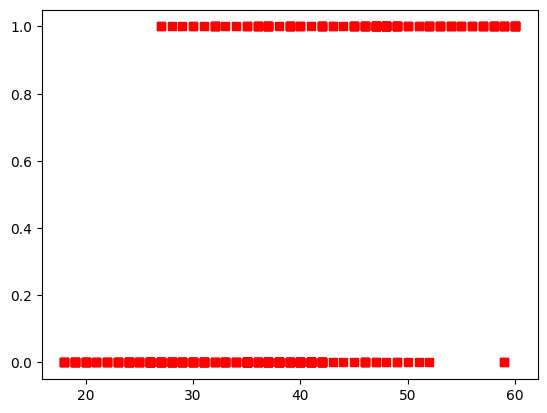

In [63]:
plt.scatter(data.Age,data.Purchased,marker='s',color='red')

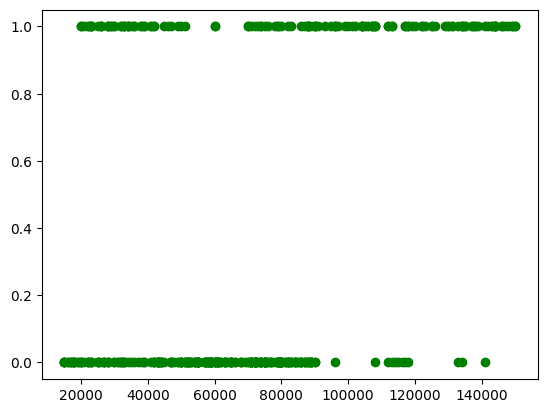

In [64]:
plt.scatter(data.EstimatedSalary,data.Purchased,color='Green')

In [71]:
x=data.drop(['Purchased','Gender'],axis=1)
x

,User ID,Age,EstimatedSalary,A_Gender
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [72]:
y=data['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=26)

In [74]:
model=KNeighborsClassifier(n_neighbors=7)

In [75]:
model

KNeighborsClassifier(n_neighbors=7)

In [76]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [77]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [78]:
y_test

36     0
30     0
301    1
325    0
345    0
      ..
349    0
269    0
285    1
203    0
133    0
Name: Purchased, Length: 100, dtype: int64

In [79]:
accuracy_score(y_test,y_predict)

0.75

In [81]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        73
           1       0.53      0.67      0.59        27

    accuracy                           0.75       100
   macro avg       0.70      0.72      0.71       100
weighted avg       0.77      0.75      0.76       100



In [82]:
cm=confusion_matrix(y_test,y_predict)

In [83]:
cm

array([[57, 16],
       [ 9, 18]], dtype=int64)

<Axes: >

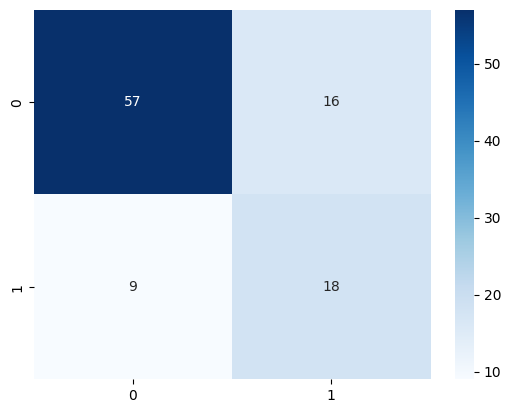

In [84]:
sns.heatmap(cm,annot=True,cmap='Blues')

Text(0, 0.5, 'errot rate')

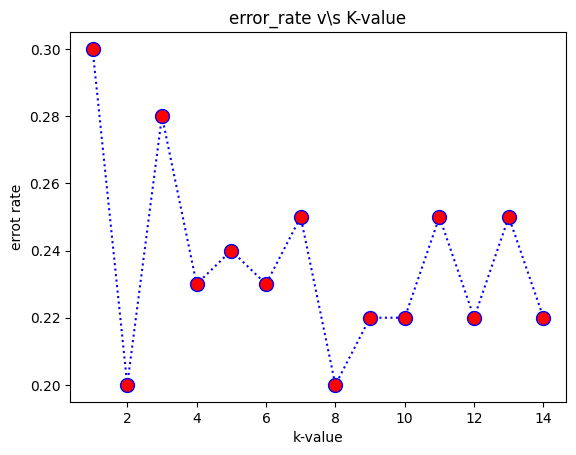

In [86]:
error_rate=[]
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))
plt.plot(range(1,15),error_rate,'o:b',mfc='r',ms=10)
plt.title('error_rate v\s K-value')
plt.xlabel('k-value')
plt.ylabel('errot rate')